In [1]:
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('all_nyc_all_features_311.csv')

In [3]:
df.groupby('quadrant')['heat_ratio'].mean()

quadrant
1    0.044146
2    0.050837
3    0.057318
4    0.074794
Name: heat_ratio, dtype: float64

In [4]:
threshold = (df.heat_ratio.mean()-df.heat_ratio.std()*2),(df.heat_ratio.mean()+df.heat_ratio.std()*2)

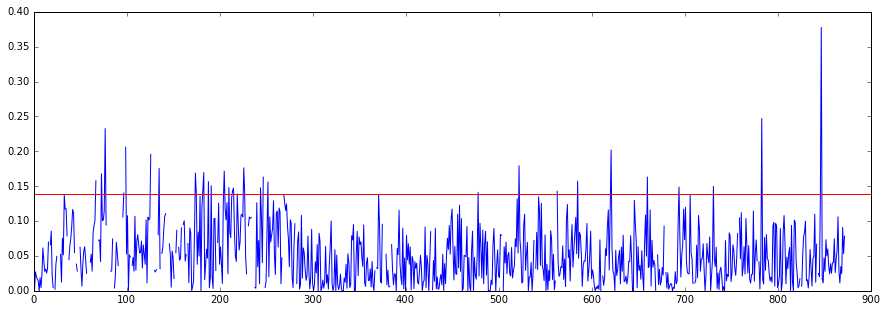

In [5]:
fig = pl.figure(figsize=(15,5))
pl.plot(df.index,df.heat_ratio,'b-')
xmin,xmax = xlim()
pl.plot([xmin,xmax],[threshold[1],threshold[1]],'r-');

In [26]:
# list(df.columns)

In [23]:
# filter for key columns
df_p = df.copy()
df_p = df_p[['heat_ratio','Families: Income in 2013 at or above poverty level','Families:','Total Population:',
       'Total Population: Under 5 Years','Total Population: 65 to 74 Years','Total Population: 75 to 84 Years',
       'Total Population: 85 Years and over','Population Density (per sq. mile)','quadrant','geometry']]

In [24]:
# calculate total vulneral populatio by age: over 65 and under 5
df_p['vulnerable'] = (df_p['Total Population: Under 5 Years']+df_p['Total Population: 65 to 74 Years']+df_p[
    'Total Population: 75 to 84 Years']+df_p['Total Population: 85 Years and over'])*1.0/df_p['Total Population:']

In [25]:
# ratio of families in poverty
df_p['pov'] = df_p['Families: Income in 2013 at or above poverty level']*1.0/df_p['Families:']

In [27]:
# prioritize by vulnerable pop == quadrant 3
df_pv = df_p.copy()
df_pv = df_pv[(df_pv.vulnerable >= df_pv.vulnerable.mean()) & (df_pv.quadrant==3)]
len(df_pv)

192

In [28]:
# further refine by heat/ac related calls
df_h = df_pv.copy()
df_h = df_h[(df_h.heat_ratio >= df_h.heat_ratio.mean()) & (df_h.quadrant==3)]
len(df_h)

72

In [29]:
# further refine by families in poverty
df_pov = df_h.copy()
df_pov = df_pov[(df_pov.pov >= df_pov.pov.mean()) & (df_pov.quadrant==3)]
len(df_pov)

42

In [30]:
# further refine by density
df_d = df_pov.copy()
df_d = df_d[(df_d['Population Density (per sq. mile)'] >= df_d['Population Density (per sq. mile)'].mean()) & (
        df_d.quadrant==3)]
len(df_d)

15